In [1]:
# !docker run --runtime nvidia -dit -p 5555:5555 -p 5556:5556 -v ../Projects/movie-recommender/data/BERT/uncased_L-12_H-768_A-12/ -t bert-as-service 3


usage: /home/jagu-secure/.local/bin/bert-serving-start -model_dir data/BERT/uncased_L-12_H-768_A-12 -num_worker=4
                 ARG   VALUE
__________________________________________________
           ckpt_name = bert_model.ckpt
         config_name = bert_config.json
                cors = *
                 cpu = False
          device_map = []
       do_lower_case = True
  fixed_embed_length = False
                fp16 = False
 gpu_memory_fraction = 0.5
       graph_tmp_dir = None
    http_max_connect = 10
           http_port = None
        mask_cls_sep = False
      max_batch_size = 256
         max_seq_len = 25
           model_dir = data/BERT/uncased_L-12_H-768_A-12
no_position_embeddings = False
    no_special_token = False
          num_worker = 4
       pooling_layer = [-2]
    pooling_strategy = REDUCE_MEAN
                port = 5555
            port_out = 5556
       prefetch_size = 10
 priority_batch_size = 16
show_tokens_to_client = False
     tuned_model_dir = None

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [3]:
wiki_path = os.path.join(os.getcwd(),"data","imdb","wiki")

In [4]:
file_names=[]
file_contents=[]
for each_file in os.listdir(wiki_path):
    lines = open(os.path.join(wiki_path,each_file)).readlines()
    to_append=[". "]
    temp = 0
    for each_line in lines:
        to_append.append(each_line.replace("\\n",""))
    file_names.append(each_file)
    file_contents.append(" ".join(to_append))

In [11]:
# from bert_serving.client import BertClient

In [4]:
# bc = BertClient()

In [19]:
# bert_encoded = bc.encode(file_contents)

In [22]:
# with open('bert_wikipedia_encoded.npy','wb') as f:
#     np.save(f, bert_encoded)

In [5]:
bert_encoded = np.load('bert_wikipedia_encoded.npy')

In [12]:
bert_encoded.shape

(14307, 768)

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

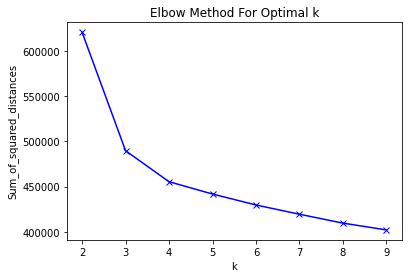

In [7]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10,random_state=32)
    km = km.fit(bert_encoded)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10,random_state=32)
model.fit(bert_encoded)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(file_names,labels)),columns=['file_name','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

       file_name  cluster
0      tt0013340        0
11034  tt0011109        0
4458   tt0004405        0
4457   tt0008564        0
4454   tt0001056        0
...          ...      ...
10754  tt0000771        3
4887   tt0012466        3
10751  tt0011937        3
10824  tt0008533        3
14306  tt0010245        3

[14307 rows x 2 columns]


In [10]:
wiki_cl["cluster"].value_counts()

3    3742
2    3677
0    3593
1    3295
Name: cluster, dtype: int64

In [11]:
wiki_cl.to_csv(os.path.join(os.getcwd(),"data","imdb","bert_wiki_clusters.csv"))